# Proyek Analisis Data: Bike Saring Dataset
- **Nama:** Syarif Hidayatullah
- **Email:** stingbugz@gmail.com
- **ID Dicoding:** syarif_200403

## Menentukan Pertanyaan Bisnis

- Bagaimana dengan trend rental sepeda beberapa tahun terakhir ?
- Bagaimana dengan perbandingan rental sepeda antara hari kerja dan hari libur ?

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime


## Data Wrangling

### Gathering Data

In [2]:
current_working_directory = os.getcwd()
hour_path = os.path.join(current_working_directory, "data", "hour.csv")
hour_df = pd.read_csv(hour_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print(hour_df.instant.last)

<bound method NDFrame.last of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>


In [4]:
day_path = os.path.join(os.getcwd(), "data", "day.csv")
day_df = pd.read_csv(day_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print(day_df.instant.last)

<bound method NDFrame.last of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>


**Insight:**
- hour_df merupakan data jumlah pengguna rental sepeda yang dikumpulkan perjam selama 17379 jam
- day_df merupakan data jumlah pengguna rental sepeda yang dikumpulkan perhari selama 731 hari

### Assessing Data

In [6]:
#cek info (hour_df)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#cek missing value (hour_df)
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#cek duplikasi data (hour_df)
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [9]:
#cek info (day_df)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
#cek missing value (day_df)
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#cek duplikasi data (day_df)
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


**Insight:**
- tidak ada missing value dan duplikasi data pada kedua dataset.
- harus mengubah (month, weekday, season, weather, year dan workingday) angka menjadi keterangan. <br>(**day_df** | **hour_df**)
- harus mengubah tipe data (season, year, month, weekday, holiday, weekday, workingday dan weather) beberapa kolom. <br>(**day_df** | **hour_df**)
- ada beberapa penamaan column kurang jelas pada kedua dataset. pada tahap cleaning akan di rename.

### Cleaning Data

In [12]:
#rename beberapa column (hour_df)
hour_df = hour_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'hum':'humidity',
    'weathersit':'weather',
    'cnt':'count',
    'hr':'hour',
    'dteday':'date'
})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
#mengubah beberapa kolom angka menjadi keterangan (hour_df)
#1. mengubah month (number) menjadi month (3 char monthname)
hour_df['month'] = hour_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})

#2. mengubah weekday(number) menjadi weekday(3 char dayname)
hour_df['weekday'] = hour_df['weekday'].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})

#3. mengubah season(number) menjadi season(name)
hour_df['season'] = hour_df['season'].map({
    1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
})

#4. mengubah weather(number) menjadi weather(name)
hour_df['weather'] = hour_df['weather'].map({
    1:'Clear/Partly Cloudy',
    2:'Misty/Cloudy',
    3:'Light Snow/Rain',
    4:'Heavy Snow/Rain'
})

#5. keterangan tahun diganti menjadi 0 untuk 2011 dan 1 untuk 2012
hour_df['year'] = hour_df['year'].map({
    0: '2011', 1: '2012'
})

#6. mengubah keterangan working day menjadi 0 untuk holiday dan 1 untuk
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Weekday'
})

# Mengubah tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather'] = hour_df.weather.astype('category')

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   date        17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [15]:
#rename beberapa column (day_df)
day_df = day_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'hum':'humidity',
    'weathersit':'weather',
    'cnt':'count',
    'hr':'hour',
    'dteday':'date'
})
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
#mengubah beberapa kolom angka menjadi keterangan (day_df)
#1. mengubah month (number) menjadi month (3 char monthname)
day_df['month'] = day_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})

#2. mengubah weekday(number) menjadi weekday(3 char dayname)
day_df['weekday'] = day_df['weekday'].map({
    0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'
})

#3. mengubah season(number) menjadi season(name)
day_df['season'] = day_df['season'].map({
    1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
})

#4. mengubah weather(number) menjadi weather(name)
day_df['weather'] = day_df['weather'].map({
    1:'Clear/Partly Cloudy',
    2:'Misty/Cloudy',
    3:'Light Snow/Rain',
    4:'Heavy Snow/Rain'
})

#5. keterangan tahun diganti menjadi 0 untuk 2011 dan 1 untuk 2012
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})

#6. mengubah keterangan working day menjadi 0 untuk holiday dan 1 untuk working day
day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather'] = day_df.weather.astype('category')

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   date        731 non-null    object  
 2   season      731 non-null    category
 3   year        731 non-null    category
 4   month       731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weather     731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  humidity    731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  count       731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 58.0+ KB


**Insight:**<br>
Setelah proses cleaning data dilakukan. Maka, dataset akan lebih readable dari pada sebelumnya

## Exploratory Data Analysis (EDA)

### Trend rental sepeda beberapa tahun terakhir

In [18]:
#grouping trend rental sepeda pertahun
bike_trend = day_df.groupby(by='year').agg({
    'count':'mean'
})
bike_trend.head()

C:\Users\Yatora\AppData\Local\Temp\ipykernel_16096\2984545191.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_trend = day_df.groupby(by='year').agg({


,count
year,
2011,3405.761644
2012,5599.934426


**Insight:**<br>
Dari hasil diatas bisa disimpulkan bahwa rental sepeda mengalami peningkatan pada tahun 2012 dibandingkan dengan tahun 2011


### Perbandingan penyewa perhari

In [19]:
#grouping penyewa pada hari senin - minggu
bike_every_day = day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
}).reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).reset_index()
bike_every_day

C:\Users\Yatora\AppData\Local\Temp\ipykernel_16096\1252888117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_every_day = day_df.groupby(by='weekday').agg({


weekday count                   
            max   min         mean
0     Mon  7525    22  4338.123810
1     Tue  7767   683  4510.663462
2     Wed  8173   441  4548.538462
3     Thu  7804   431  4667.259615
4     Fri  8362  1167  4690.288462
5     Sat  8714   627  4550.542857
6     Sun  8227   605  4228.828571

In [20]:
#menghitung rerata penyewa sepeda selama 2011 dan 2012 pada weekday dan weekend
avg_weekday = bike_every_day[1:6]['count']['mean'].sum()/5
avg_weekend = bike_every_day[5:]['count']['mean'].sum()/2
print("weekday: ", avg_weekday)
print("weekend: ", avg_weekend)

weekday:  4593.458571428571
weekend:  4389.685714285714


**Insight:**<br>
Berdasarkan pola di atas bisa disimpulkan bahwa jumlah penyewa meningkat pada weekday dan menurun di weekend. Itu berarti masyarakat lebih sering menyewa sepeda pada hari senin-jum'at dibandingkan dengan sabtu-minggu

### Perbandingan penyewa pada holidays dan workingdays

In [21]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\Yatora\AppData\Local\Temp\ipykernel_16096\3484920239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
Holiday     8714  605  4330.168831
Workingday  8362   22  4584.820000

**Insight:**<br>
Berdasarkan hasil diatas bisa disimpulkan bahwa penyewa sepeda lebih sering menyewa sepeda pada hari kerja atau wrokingday

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana dengan trend rental sepeda beberapa tahun terakhir ?

In [22]:
bike_trend.reset_index().head()

,year,count
0,2011,3405.761644
1,2012,5599.934426


C:\Users\Yatora\AppData\Local\Temp\ipykernel_16096\279873339.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = day_df.groupby(by=['month', 'year']).agg({


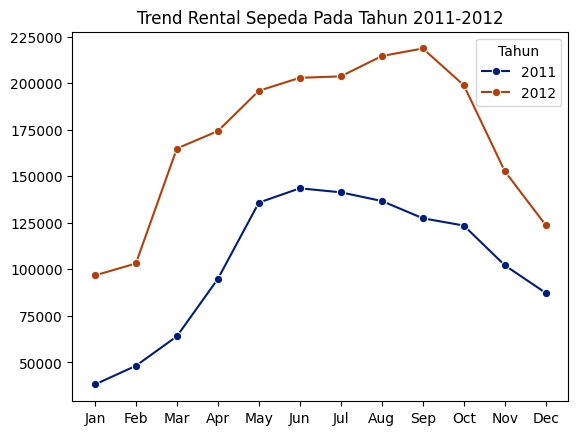

In [23]:
day_df['month'] = pd.Categorical(
    day_df['month'], 
    categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True    
)

monthly = day_df.groupby(by=['month', 'year']).agg({
    'count':'sum'
}).reset_index()

sns.lineplot(
    data=monthly,
    x='month',
    y='count',
    hue='year',
    palette='dark',
    marker='o'
)
plt.title("Trend Rental Sepeda Pada Tahun 2011-2012")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc='upper right')
plt.show()

**Insight:**<br>
Terlihat dalam line chart diatas, pada tahun 2012 jumlah penyewa sepeda naik dibandingkan tahun sebelumnya

### Pertanyaan 2: Bagaimana dengan perbandingan rental sepeda antara hari kerja dan hari libur ?

C:\Users\Yatora\AppData\Local\Temp\ipykernel_16096\2678539104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


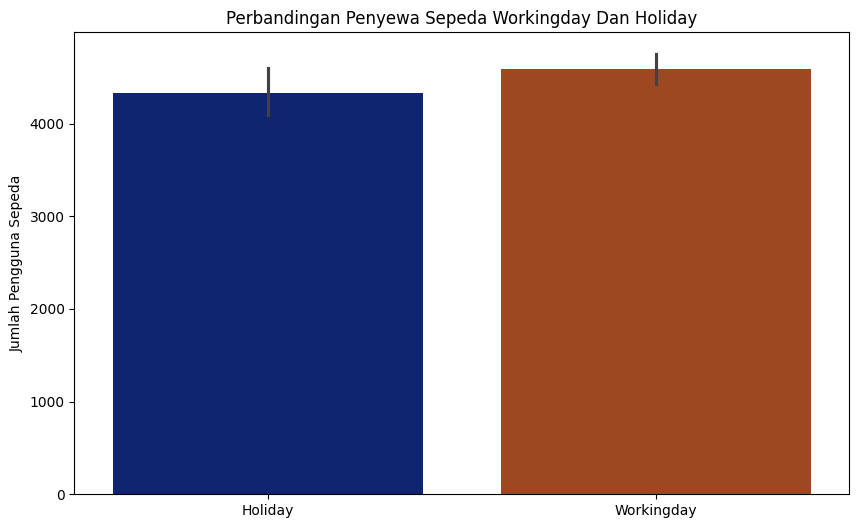

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    palette='dark')

plt.title('Perbandingan Penyewa Sepeda Workingday Dan Holiday')
plt.xlabel(None)
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

**Insight:**<br>
Visualisasi di atas menunjukkan bahwa, penyewaan meningkat ketika workingday daripada holiday

## Conclusion

- Conclution pertanyaan 1: Bagaimana dengan trend rental sepeda beberapa tahun terakhir ?<br>
  Tren penyewaan sepeda pada tahun 2012 mengalami peningkatan dibandingkan tahun 2011. Penyewaan sepeda meningkat pada pertengahan tahun yaitu pada bulan Mei hingga September, dan mengalami penurunan pada awal dan akhir tahun.
  
- Conclution pertanyaan 2: Bagaimana dengan perbandingan rental sepeda antara hari kerja dan hari libur ?<br>
  Jumlah penyewaan sepeda paling banyak pada hari kerja. Itu berati, masyarakat menggunakan sepeda untuk melakukan aktivitas sehari-hari seperti sekolah, bekerja dan kegiatan lainnya.

### Ubah data frame yang sudah clean menjadi file csv untuk resource di streamlit

In [25]:
dashboard_path = os.path.join(current_working_directory, "dashboard")
day_df.to_csv(f"{dashboard_path}/hour_cleaned.csv")
hour_df.to_csv(f"{dashboard_path}/day_cleaned.csv")